### This is the actual production function(s)

`create_world.py` generates the full world. 

I'm a big fan of rouge-like games and RPGs. I'm also a big fan of data science tools for Python. This is my attempt to have it all. 

In [1]:
import pandas as pd
import numpy as np
import os
import django
import sys


sys.path.append("../..")
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "prodweb.settings")
django.setup()

sys.path.append("../")
import lib.create_world as c
import lib.drawMaps as draw
import lib.builders.culture as culture
import lib.builders.landscape as landscape
import lib.builders.towns as towns
import lib.builders.people as people
import lib.builders.nations as nations


pd.set_option("display.max_columns", 10)
pd.set_option("display.max_rows", 10)
%load_ext lab_black

## `timeit` functions to examin the runtime of each component. 

In [2]:
# %%timeit
# geo_world = c.the_first_age({})

In [3]:
geo_world = c.the_first_age({})

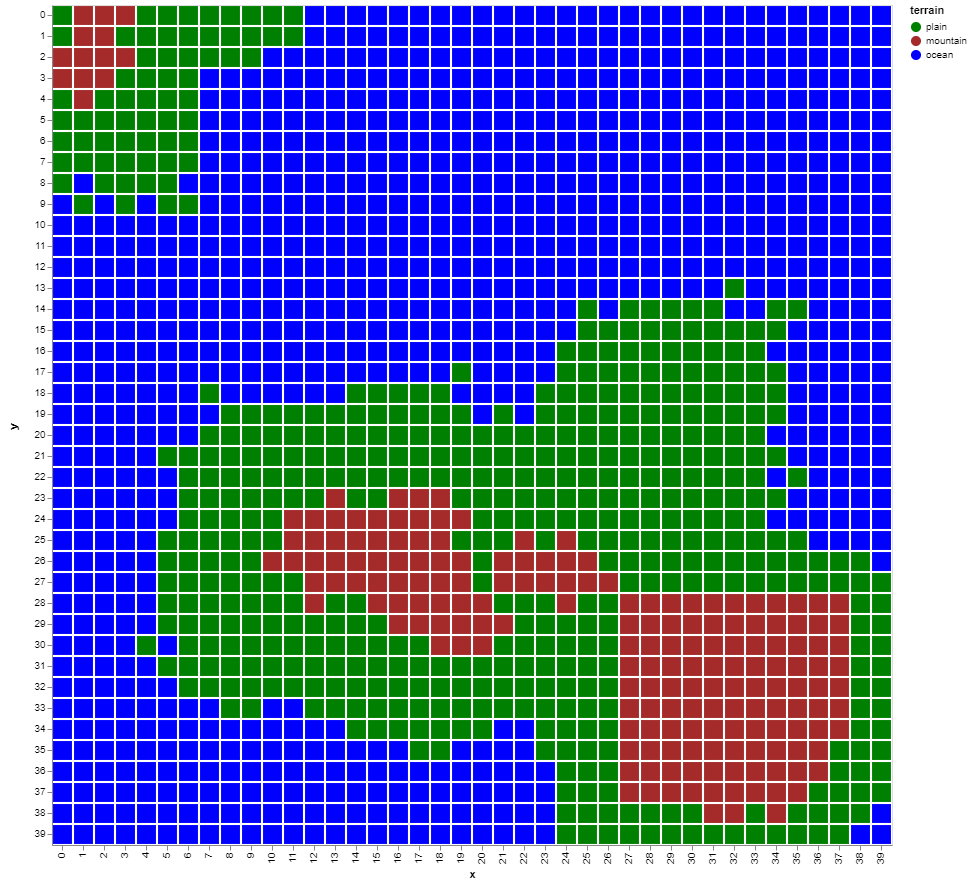

In [4]:
draw.drawTerrainTypes(geo_world.grid_elevation, geo_world.landscape)

# Second Age : Towns and Nations

In [5]:
geo_world.df_features

,y,rainfall,x,key,elevation,terrain
key,,,,,,
0:0,0,20.0,0,0:0,20.0,plain
1:0,0,21.0,1,1:0,25.0,mountain
2:0,0,18.0,2,2:0,29.0,mountain
3:0,0,15.0,3,3:0,25.0,mountain
4:0,0,11.0,4,4:0,22.0,plain
...,...,...,...,...,...,...
35:39,39,7.0,35,35:39,12.0,plain
36:39,39,7.0,36,36:39,11.0,plain
37:39,39,6.0,37,37:39,8.0,plain


In [6]:
world = c.the_second_age(geo_world, {})

2:0 mountain
6:23 plain
10:32 desert
16:24 mountain
32:25 plain
10:32 town
16:24 town
39:36 plain
9:32 desert
11:31 plain
2:0 town
5:2 plain
2:4 plain
30:28 mountain
24:23 forest
2:0 town
6:23 town
16:24 town
32:25 town
39:36 town
9:32 town
11:31 town
30:28 town
24:23 town
32:25 town
5:2 town
2:4 town
31:30 mountain
29:37 mountain
10:24 plain
16:24 town
39:36 town
29:15 forest
38:35 plain
9:26 plain
2:0 town
6:23 town
16:24 town
9:32 town
30:28 town
24:23 town
31:30 town
10:24 town
29:15 town
38:35 town
31:34 mountain
27:36 mountain
32:25 town
5:2 town
9:26 town
27:36 town
14:28 forest
2:0 town
32:25 town
30:28 town
24:23 town
31:30 town
29:15 town
38:35 town
27:36 town
14:28 town
38:26 plain
21:22 forest
28:14 forest
10:32 town
32:25 town
39:36 town
11:31 town
5:2 town
24:23 town
31:30 town
10:24 town
29:15 town
9:26 town
31:34 town


In [7]:
world.df_features.loc["4:33"].terrain

'ocean'

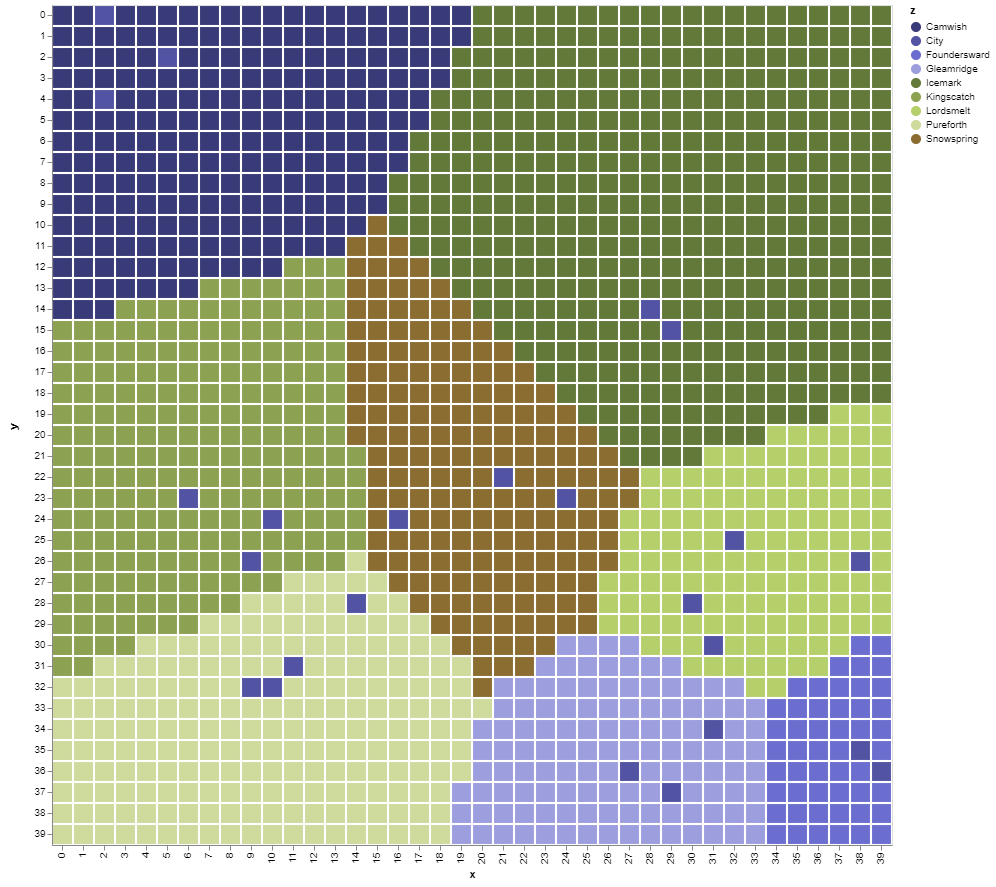

In [8]:
draw.drawboarders(world.df_features)

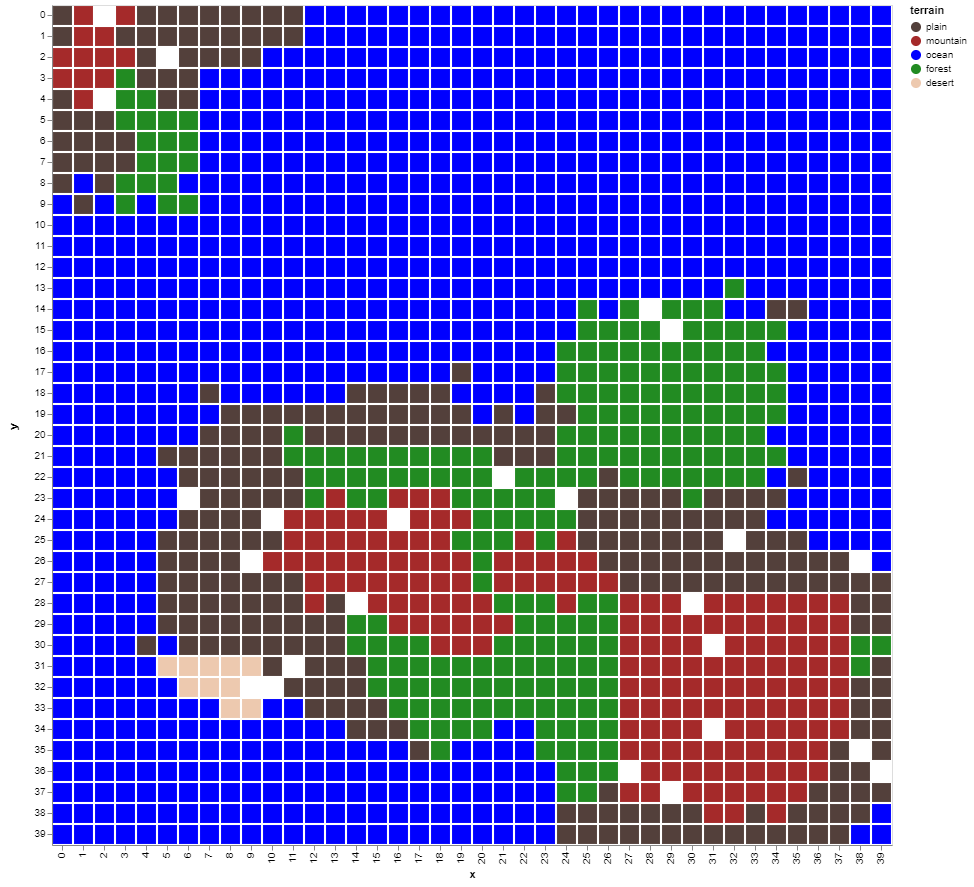

In [9]:
draw.drawterrainadvanced(world.df_features)

## The third age, conflict

In [10]:
world, events = c.the_third_age(world)
people

<module 'lib.builders.people' from '../lib/builders/people.py'>

In [16]:
[n.set_capitol(world) for n in world.nations]

[None, None, None, None, None, None, None, None]

In [17]:
world.towns

[capitol of Badgerridge: population: 5 location: [2,0] founded 0,
 capitol of Malgarden: population: 3 location: [6,23] founded 0,
 capitol of Magehollow: population: 3 location: [10,32] founded 0,
 capitol of Doomring: population: 5 location: [16,24] founded 1,
 capitol of Gleamrun: population: 6 location: [32,25] founded 1,
 capitol of Lilycoil: population: 4 location: [39,36] founded 2,
 town of Landscatch: population: 3 location: [9,32] founded 2,
 town of Lordspike: population: 3 location: [11,31] founded 2,
 town of Campike: population: 4 location: [5,2] founded 3,
 town of Artspring: population: 2 location: [2,4] founded 3,
 town of Fallmain: population: 4 location: [30,28] founded 3,
 town of Waterloch: population: 5 location: [24,23] founded 3,
 town of Artcatch: population: 4 location: [31,30] founded 5,
 town of Fallloch: population: 1 location: [29,37] founded 5,
 town of Lordshammer: population: 3 location: [10,24] founded 5,
 capitol of Hardhollow: population: 4 location:

In [13]:
len(world.people)

75

In [14]:
world.people

[Sehaker the Speaker of Badgerridge,
 Nerroch the Speaker of Malgarden,
 Iratallel the Speaker of Magehollow,
 Urgordett the Speaker of Doomring,
 Thagennish the Speaker of Gleamrun,
 Labben the commoner,
 Stuflottle the commoner,
 Rerandof the Speaker of Lilycoil,
 Quowallion the Speaker of Landscatch,
 Piklipif the Speaker of Lordspike,
 Iraspust the commoner,
 Doglut the Speaker of Campike,
 Mefallan the Speaker of Artspring,
 Wralnash the Speaker of Fallmain,
 Iracha the Speaker of Waterloch,
 Ekinkal the commoner,
 Illiafilled the commoner,
 Nebrove the commoner,
 Stescive the commoner,
 Erizennid the commoner,
 Kackrot the commoner,
 Urkilled the commoner,
 Traboldad the commoner,
 Alvallel the commoner,
 Xispith the commoner,
 Fawaker the commoner,
 Anastard the commoner,
 Zhotoldnan the Speaker of Artcatch,
 Deklipoch the Speaker of Fallloch,
 Figraf the Speaker of Lordshammer,
 Nanoddent the commoner,
 Mesassec the commoner,
 Lennim the Speaker of Hardhollow,
 Scoldish the Spe